In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pprint
import itertools
import seaborn as sns
path_to_data = '/home/sayan/Documents/Data Science/DATA1030/project/data'

In [2]:
df = pd.read_csv(path_to_data+'/data_pp.csv')
df_raw = pd.read_csv(path_to_data+'/data_raw_final_date_separated.csv')
#print(df_raw.isnull().sum(axis=0)/df_raw.shape[0])
df.round(4);
df_raw.round(4);

In [3]:
df.columns

Index(['length', 'key', 'duration_ms', 'tempo', 'time_signature', 'loudness',
       'date_year', 'date_month', 'date_day', 'decade', 'acousticness',
       'speechiness', 'instrumentalness', 'danceability', 'valence',
       'liveness', 'mode', 'energy', 'id', 'album_id', 'billboard',
       'track_length'],
      dtype='object')

### Remove some outlier dates

In [4]:
label = 'billboard'
df.columns
indexNames = df[ df_raw['decade'] < 1950].index

df = df.drop(indexNames , inplace=False)
df_raw = df_raw.drop(indexNames , inplace=False)
pd.value_counts(df['billboard'],normalize=(True))

1.0    0.88862
0.0    0.11138
Name: billboard, dtype: float64

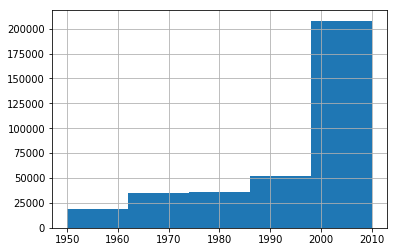

In [5]:
df_raw.head()
df_raw['decade'].hist(bins=5)
plt.savefig('../figures/billboard_decade.png')

In [ ]:
cont_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'date_year',
       'speechiness', 'tempo', 'time_signature', 'valence', 'length']

## Describing each feature

### Distribution of year

In [ ]:
df_raw['date_year'].hist(normed=True)

### Check the Balance of the dataset:

In [ ]:
print(df.shape)
pd.value_counts(df['billboard'],normalize=(True)).plot.bar()
plt.savefig('../figures/balance.png',dpi=300)

### Check the independence of parameters

In [ ]:
#df_corr_plot = df
#df_corr_plot.drop(['date_year','date_day','date_month'],axis=1,inplace=True)
plt.figure(figsize=(5,5))

df_corr_plot = df
df_corr_plot.drop(['date_year','date_day','date_month'],axis=1,inplace=True)
plt.matshow(df.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df.corr().shape[0]),list(df.corr().columns),rotation=90)
plt.yticks(np.arange(df.corr().shape[0]),list(df.corr().columns))
plt.tight_layout()
plt.savefig('../figures/corr_coeff.png',dpi=300)

plt.show()

### Check the effect of features with label

### Violin Plots for acoustic features across billboard

In [ ]:
for column in cont_cols:
    mini_set = [df[df[label] == 1][column].values, df[df[label] == 0][column].values]
    plt.violinplot(dataset = mini_set)
    plt.xticks([1,2],['1','0'])
    plt.ylabel(column)
    plt.xlabel("Billboard")
    plt.suptitle("")
    fname = '../figures/violin_'+str(column)+'.png'
    plt.savefig(fname,dpi=300)
    plt.show()

### Scatter plots for features with years

In [ ]:
for column in cont_cols:
    fg = sns.FacetGrid(data=df_raw, hue='billboard', hue_order=[0,1], aspect=1.61)
    fg.map(plt.scatter, 'date_year', column, alpha=0.1).add_legend()
    fname = '../figures/scatter_year_'+str(column)+'.png'
    fg.savefig(fname,dpi=300)

### Histograms for features in decade

In [ ]:
for column in cont_cols:
    categories = df_raw['decade'].unique()
    bin_range = (df_raw[column].min(),df_raw[column].max())

    for c in categories:
        plt.hist(df_raw[df_raw['decade']==c][column],alpha=0.5,label=str(c),range=bin_range,bins=10,normed=True)

    plt.legend()
    plt.ylabel('count')
    plt.xlabel(column)
    fname = '../figures/histo_decade'+str(column)+'.png'
    plt.savefig(fname,dpi=300)
    plt.show()

### Scatter Matrix

In [ ]:
pd.plotting.scatter_matrix(df[['instrumentalness','duration_ms','time_signature']],c = df['billboard'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
#plt.savefig('figures/scatter_matrix_dummies.png',dpi=300)
handles = [plt.plot([],[], ls="", marker="o", \
                    markersize=np.sqrt(10))[0] for i in range(2)]
labels=["0","1"]
plt.legend(handles, labels, loc=(1.02,0))
plt.show()
plt.show()

### Decade wise count matrix for billboard

In [ ]:
df_cm = df_raw[df_raw['date_year'] > 1950]
count_matrix = df_cm.groupby(['decade', label]).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.matshow(count_matrix_norm.T,vmin=0,vmax=1)
plt.xticks(np.arange(count_matrix_norm.shape[0]),count_matrix_norm.index,rotation=90)
plt.yticks(np.arange(count_matrix_norm.shape[1]),count_matrix_norm.columns)
plt.colorbar(label='fraction')
plt.savefig('../figures/decade_billboard.png')

In [ ]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Billboard')
plt.legend(loc=3)
plt.savefig('../figures/decade_stacked_bar.png',dpi=300)
plt.show()

### Box plots checking variation of features with decade

In [ ]:
import matplotlib.ticker as mticker

for column in cont_cols:
    df_raw[[column,'decade']].boxplot(by='decade')
    plt.ylabel(column)
    plt.xlabel('decade')
    plt.suptitle("")
    fname = '../figures/box_decade'+str(column)+'.png'
    plt.savefig(fname,dpi=300)
    plt.show()

### Heatmaps for feature to feature interaction

In [ ]:
from matplotlib.ticker import FormatStrFormatter

for (column1,column2) in itertools.combinations(cont_cols,2):
    heatmap, xedges, yedges = np.histogram2d(df_raw[df_raw['billboard'] == 0][column1], df_raw[df_raw['billboard'] == 0][column2], bins=20, normed=True)
    extent = [round(xedges[0],2), round(xedges[-1],2), round(yedges[0],2), round(yedges[-1],2)]

    plt.imshow(heatmap.T, origin='lower')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.xticks(np.around(np.arange(20)[::5],decimals=4),np.around(xedges[::5],decimals=4))
    plt.yticks(np.around(np.arange(20)[::5],decimals=4),np.around(yedges[::5],decimals=4))
    plt.colorbar(label='count')
    fname = '../figures/heatmap'+str(column1)+'_'+str(column2)+'_0.png'
    plt.savefig(fname,dpi=300)
    plt.show()

In [ ]:
for (column1,column2) in itertools.combinations(cont_cols,2):
    heatmap, xedges, yedges = np.histogram2d(df_raw[df_raw['billboard'] == 1][column1], df_raw[df_raw['billboard'] == 1][column2], bins=20, normed=True)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.imshow(heatmap.T, origin='lower')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.xticks(np.around(np.arange(20)[::5],decimals=4),np.around(xedges[::5],decimals=4))
    plt.yticks(np.around(np.arange(20)[::5],decimals=4),np.around(yedges[::5],decimals=4))
    plt.colorbar(label='count')
    fname = '../figures/heatmap'+str(column1)+'_'+str(column2)+'_1.png'
    plt.savefig(fname,dpi=300)
    plt.show()

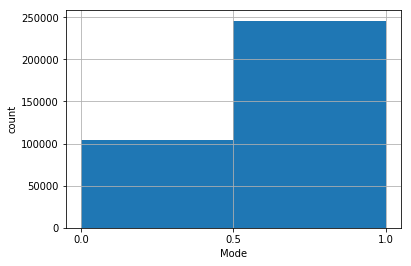

In [7]:
df_raw['mode'].hist(bins=2)
plt.ylabel('count')
plt.xlabel('Mode')
plt.xticks([0,0.5,1])
plt.savefig('../figures/mode_explained.png',bbox_inches='tight')

In [ ]:
df_raw['time_signature'].unique()

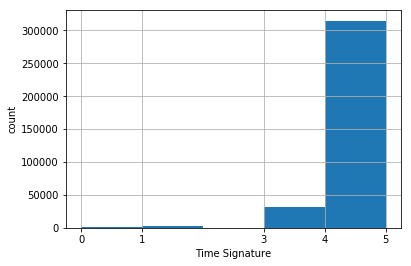

In [8]:
df_raw['time_signature'].hist(bins=5)
plt.ylabel('count')
plt.xlabel('Time Signature')
plt.xticks([0,1,3,4,5])
plt.savefig('../figures/time_signature.png',bbox_inches='tight')

In [ ]:
df_raw['duration_ms'].hist()

In [ ]:
df_raw[df_raw['date_year'] > 2015]['billboard']